## **Import Libraries**

In [118]:
!pip install mlxtend

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.stats import kurtosis

## **Import data**

In [2]:
raw_data = pd.read_csv('/content/Training Data.csv', index_col=False, delimiter = ',')
states_data = pd.read_csv('/content/List of states by area.csv', index_col=False, delimiter = ',')

## **Explore data**

In [3]:
raw_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
cat_var = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
num_var = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [6]:
print('Unique values of category variables:')
print('--------'*5)
for i in cat_var:
    print('{}: {}'.format(i,raw_data[i].unique()))

Unique values of category variables:
----------------------------------------
Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_speciali

## **Consolidate Data**

In [7]:
Profession_type = {'Mechanical_engineer':'Professional', 'Software_Developer':'Service', 'Technical_writer':'Service',
       'Civil_servant':'Government', 'Librarian':'Service', 'Economist':'Service', 'Flight_attendant':'Service',
       'Architect':'Professional', 'Designer':'Service', 'Physician':'Professional', 'Financial_Analyst':'Service',
       'Air_traffic_controller':'Professional', 'Politician':'Government', 'Police_officer':'Government', 'Artist':'Service',
       'Surveyor':'Service', 'Design_Engineer':'Professional', 'Chemical_engineer':'Professional',
       'Hotel_Manager':'Service', 'Dentist':'Professional', 'Comedian':'Service', 'Biomedical_Engineer':'Professional',
       'Graphic_Designer':'Service', 'Computer_hardware_engineer':'Service',
       'Petroleum_Engineer':'Professional', 'Secretary':'Service', 'Computer_operator':'Service',
       'Chartered_Accountant':'Professional', 'Technician':'Service', 'Microbiologist':'Professional',
       'Fashion_Designer':'Service', 'Aviator':'Professional', 'Psychologist':'Professional', 'Magistrate':'Professional',
       'Lawyer':'Professional', 'Firefighter':'Government', 'Engineer':'Professional', 'Official':'Service', 'Analyst':'Service',
       'Geologist':'Professional', 'Drafter':'Service', 'Statistician':'Professional', 'Web_designer':'Service',
       'Consultant':'Professional', 'Chef':'Service', 'Army_officer':'Government', 'Surgeon':'Professional', 'Scientist':'Professional',
       'Civil_engineer':'Professional', 'Industrial_Engineer':'Professional', 'Technology_specialist':'Service'}

In [8]:
raw_data['Profession_Cat'] = raw_data['Profession'].map(Profession_type)

In [9]:
raw_data['Rev_State'] = raw_data['STATE'].str.replace('_', ' ', regex=True)
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace('[','', regex=True)
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace(']', '', regex=True)

In [10]:
raw_data['Rev_State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra Pradesh',
       'West Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar Pradesh', 'Himachal Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu and Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar Pradesh5', 'Manipur', 'Sikkim'], dtype=object)

In [11]:
raw_data['Rev_State'] = raw_data['Rev_State'].str.replace('Uttar Pradesh5', 'Uttar Pradesh',regex=True)

In [12]:
states_data.head(10)

,Rank,State (S) / Union Territory (UT),Area (km2),Region,National share (%)
0,1 (S1),Rajasthan,"3,42,239",Northern,10.41
1,2 (S2),Madhya Pradesh,"3,08,245",Central,9.38
2,3 (S3),Maharashtra,"3,07,713",Western,9.36
3,4 (S4),Uttar Pradesh,"2,40,928",Northern,7.33
4,5 (S5),Gujarat,"1,96,024",Western,5.96
5,6 (S6),Karnataka,"1,91,792",Southern,5.83
6,7 (S7),Andhra Pradesh,"1,62,975",Southern,4.96
7,8 (S8),Odisha,"1,55,707",Eastern,4.74
8,9 (S9),Chhattisgarh,"1,35,191",Central,4.11
9,10 (S10),Tamil Nadu,"1,30,058",Southern,3.96


In [13]:
states_data.rename(columns = {'State (S) / Union Territory (UT)': 'Rev_State'}, inplace = True)

In [14]:
consolidated_data = pd.merge(raw_data, states_data[['Rev_State', 'Region']], how = 'left')

In [15]:
consolidated_data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Cat,Rev_State,Region
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Professional,Madhya Pradesh,Central
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Service,Maharashtra,Western
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Service,Kerala,Southern
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Service,Odisha,Eastern
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Government,Tamil Nadu,Southern
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0,Government,Maharashtra,Western
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0,Service,Tamil Nadu,Southern
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0,Service,Gujarat,Western
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0,Service,Rajasthan,Northern
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0,Professional,Telangana,Southern


In [16]:
consolidated_data = consolidated_data.drop(['CITY', 'STATE', 'Profession', 'Rev_State'], axis = 1)

In [17]:
consolidated_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Profession_Cat       0
Region               0
dtype: int64

In [18]:
consolidated_data.to_csv('Loan_prediction_final.csv', index = False)

In [19]:
loan_df = pd.read_csv('/content/Loan_prediction_final.csv')

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   CURRENT_JOB_YRS    252000 non-null  int64 
 8   CURRENT_HOUSE_YRS  252000 non-null  int64 
 9   Risk_Flag          252000 non-null  int64 
 10  Profession_Cat     252000 non-null  object
 11  Region             252000 non-null  object
dtypes: int64(7), object(5)
memory usage: 23.1+ MB


In [21]:
cat_var = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession_Cat', 'Region']

## **Exploratory Data Analysis (EDA)**

In [22]:
loan_df = loan_df.drop('Id', axis = 1)

In [23]:
loan_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Income,252000.0,NaN,NaN,NaN,4997116.665325,2878311.013611,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,NaN,NaN,NaN,49.954071,17.063855,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,NaN,NaN,NaN,10.084437,6.00259,0.0,5.0,10.0,15.0,20.0
Married/Single,252000,2,single,226272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_Ownership,252000,3,rented,231898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Ownership,252000,2,no,176000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CURRENT_JOB_YRS,252000.0,NaN,NaN,NaN,6.333877,3.647053,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,NaN,NaN,NaN,11.997794,1.399037,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,NaN,NaN,NaN,0.123,0.328438,0.0,0.0,0.0,0.0,1.0
Profession_Cat,252000,3,Professional,114446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Missing value
loan_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Profession_Cat       0
Region               0
dtype: int64

In [25]:
# Calculate the skewness
for var in num_var:
  print(var, ":", skew(loan_df[var], axis=0, bias=True))

Income : 0.005957527939224338
Age : -0.00531556412396366
Experience : -0.012778951281160219
CURRENT_JOB_YRS : 0.27314433155243134
CURRENT_HOUSE_YRS : 0.0067860588471736856


In [26]:
# Calculate the kurtosis
for var in num_var:
  print(var, ":", kurtosis(loan_df[var], axis=0, bias=True))

Income : -1.1986385673635056
Age : -1.204768571845771
Experience : -1.1949387362671748
CURRENT_JOB_YRS : -0.7859814508239982
CURRENT_HOUSE_YRS : -1.2749475050832586


### **Unvariate Analysis**

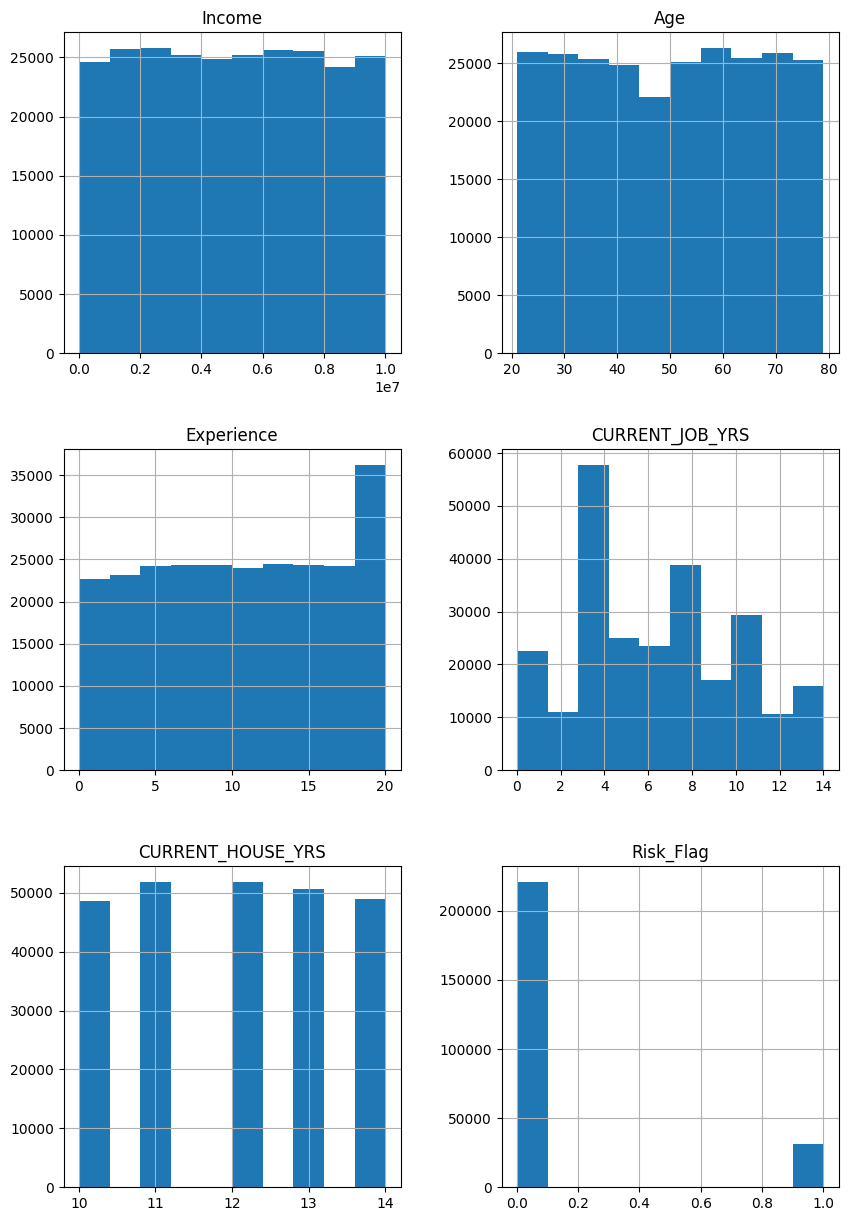

In [26]:
loan_df.hist(figsize =(10, 15))
plt.show()

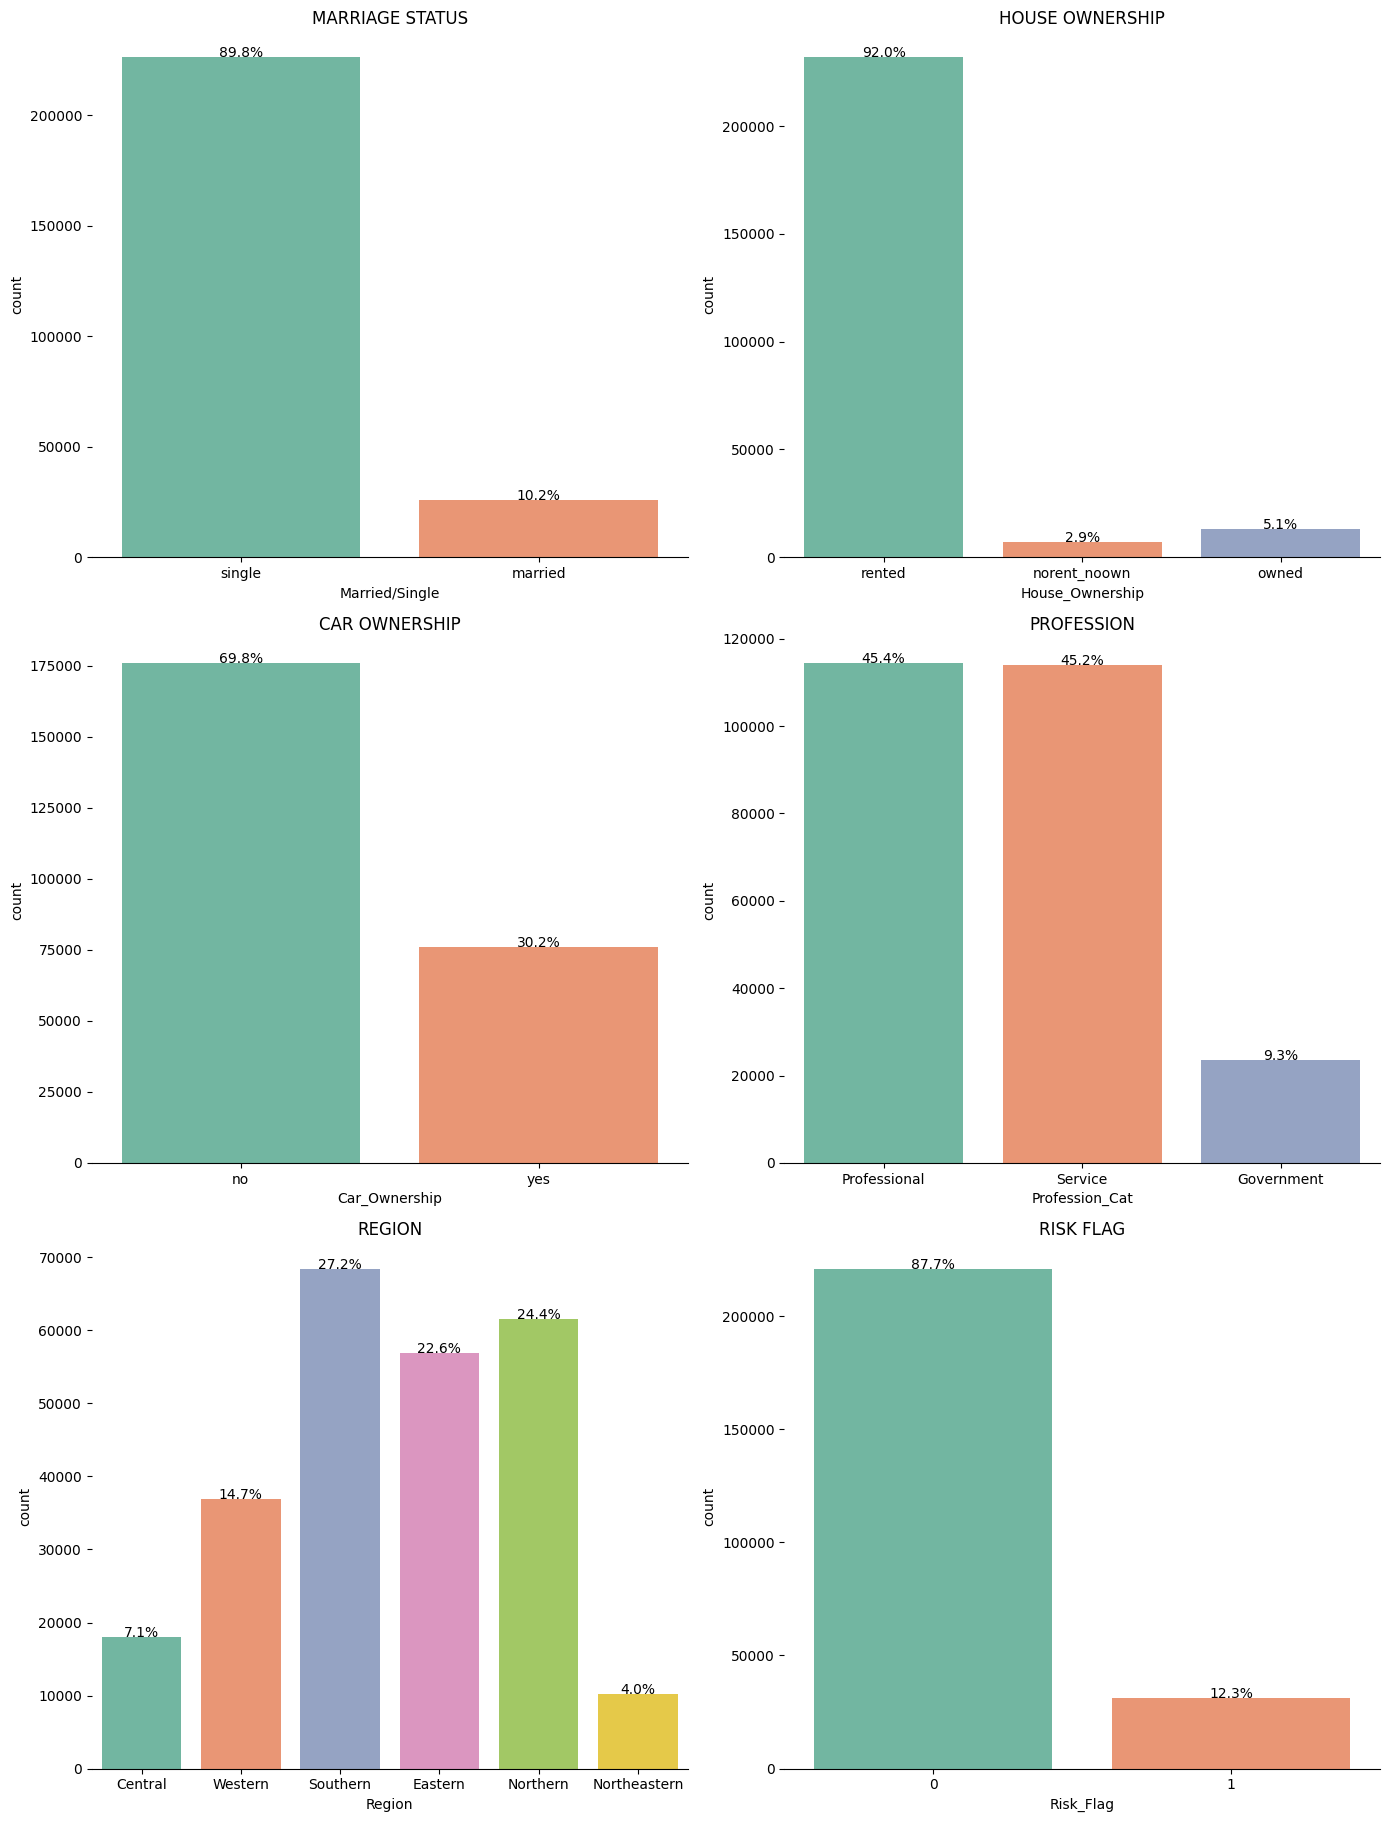

In [27]:
title=['Marriage Status', 'House Ownership', 'Car Ownership', 'Profession', 'Region', 'Risk Flag']
plt.figure(figsize=(14,30))
for i, variable in enumerate(cat_var + ["Risk_Flag"]):
    plt.subplot(5,2,i+1)
    sns.set_palette('Set2')
    ax=sns.countplot(x=loan_df[variable], data=loan_df)
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df[variable]))
          x = p.get_x() + p.get_width() / 2
          y = p.get_y() + p.get_height() + 10
          plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
plt.show()

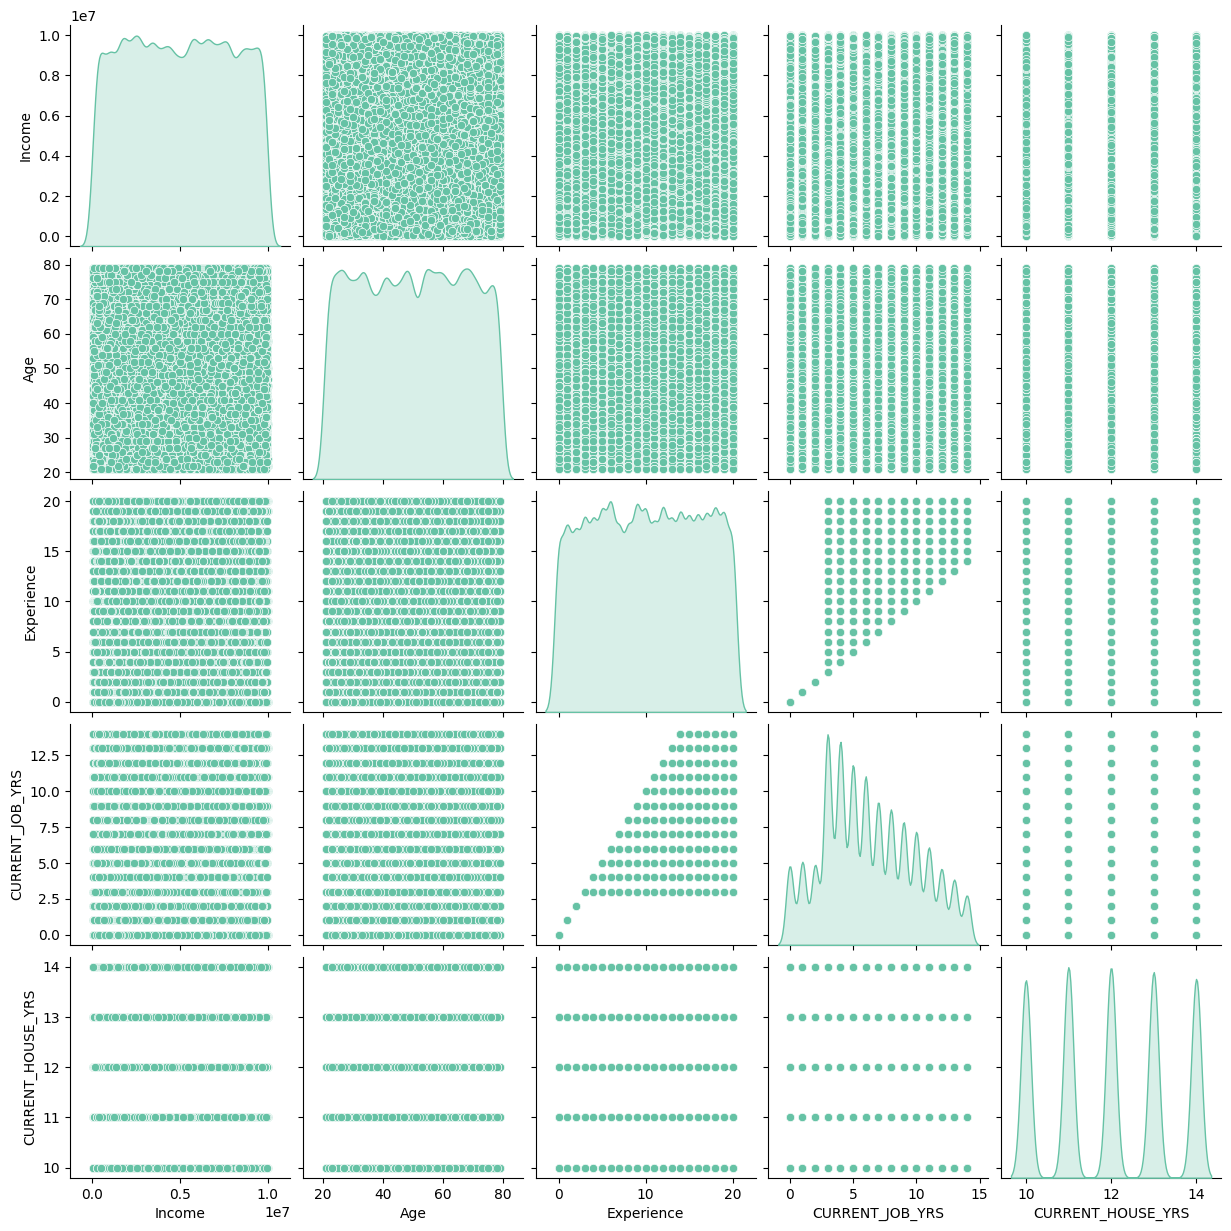

In [29]:
sns.pairplot(loan_df[num_var], diag_kind='kde')
plt.show()

### **Multivariate Analysis**

In [27]:
for i in num_var:
  print(pd.qcut(loan_df[i],q=3).value_counts())

(10309.999, 3318935.0]    84010
(3318935.0, 6647587.0]    84002
(6647587.0, 9999938.0]    83988
Name: Income, dtype: int64
(40.0, 60.0]      86039
(20.999, 40.0]    85149
(60.0, 79.0]      80812
Name: Age, dtype: int64
(-0.001, 7.0]    94412
(7.0, 14.0]      85120
(14.0, 20.0]     72468
Name: Experience, dtype: int64
(-0.001, 4.0]    91504
(4.0, 8.0]       87381
(8.0, 14.0]      73115
Name: CURRENT_JOB_YRS, dtype: int64
(11.0, 13.0]     102450
(9.999, 11.0]    100547
(13.0, 14.0]      49003
Name: CURRENT_HOUSE_YRS, dtype: int64


In [28]:
print(pd.qcut(loan_df["CURRENT_HOUSE_YRS"],q=2).value_counts())

(9.999, 12.0]    152338
(12.0, 14.0]      99662
Name: CURRENT_HOUSE_YRS, dtype: int64


In [29]:
bin_labels1 = ['Young','Middle-Age','Senior']
loan_df['Age_Group'] = pd.qcut(loan_df['Age'],q=3,labels=bin_labels1)

In [30]:
bin_labels = ['Low','Medium','High']
loan_df['Income_Category'] = pd.qcut(loan_df['Income'],q=3,labels=bin_labels)

In [31]:
bin_labels = ['Low','Medium','High']
loan_df['Experience_Category'] = pd.qcut(loan_df['Experience'],q=3,labels=bin_labels)

In [32]:
bin_labels = ['Low','Medium','High']
loan_df['Current_JobYrs_Category'] = pd.qcut(loan_df['CURRENT_JOB_YRS'],q=3,labels=bin_labels)

In [33]:
bin_labels = ["10-12", "12-14"]
loan_df['Current_HouseYrs_Category'] = pd.qcut(loan_df['CURRENT_HOUSE_YRS'],q=2,labels=bin_labels)

In [34]:
def groupby_barchart(feature):
  df2 = loan_df.groupby([feature,'Risk_Flag']).agg({'Risk_Flag':'count'})
  df3 = df2.groupby(level=0, group_keys = False).apply(lambda x : 100 * x / float(x.sum()))
  fig = df3['Risk_Flag'].plot(kind='bar', color=['grey', 'pink', 'maroon', 'grey', 'pink','maroon'],title=f"Risk flag (%) by {feature}")
  fig.bar_label(fig.containers[0])

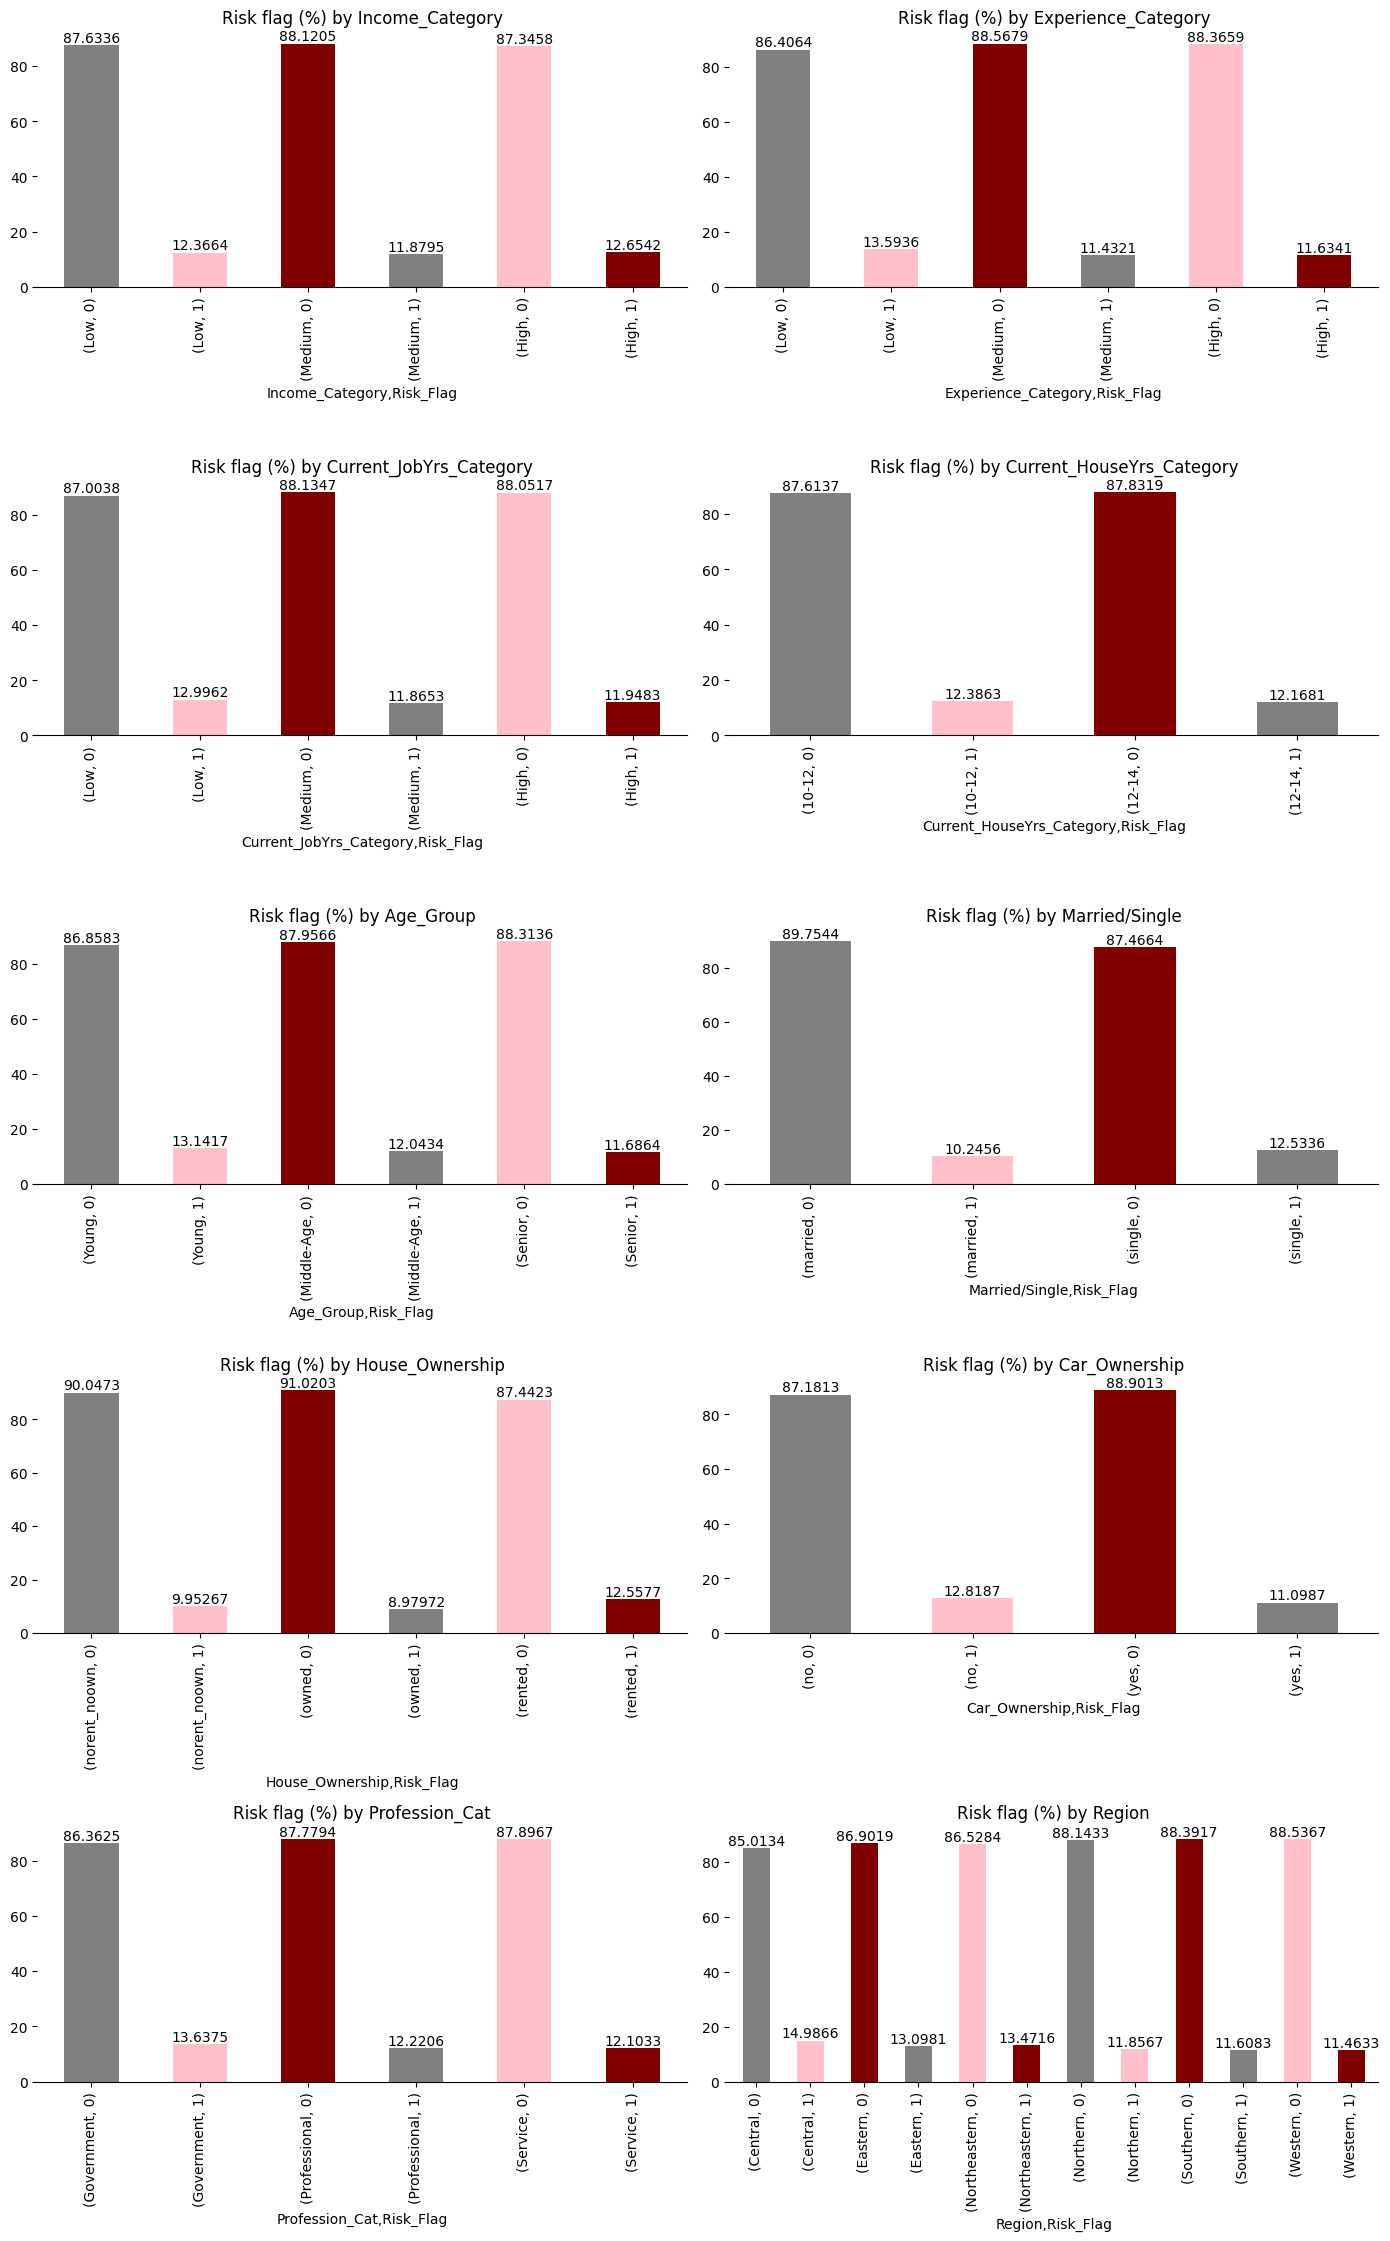

In [35]:
plt.figure(figsize=(14,30))
for i, variable in enumerate(["Income_Category", "Experience_Category", "Current_JobYrs_Category", "Current_HouseYrs_Category", "Age_Group"] + cat_var):
  plt.subplot(7,2,i+1)
  sns.set_palette('Set2')
  groupby_barchart(variable)
  sns.despine(top=True,right=True,left=True) # to remove side line from graph
  plt.tight_layout()
plt.show()

### **Correlation Heatmap**

<ipython-input-36-71ecee3a81d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)


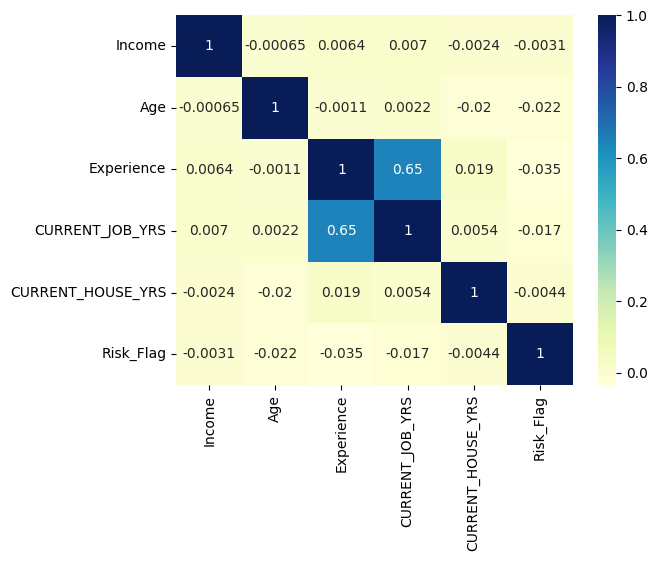

In [36]:
dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)

## **Data Encoding**

In [34]:
encoded_var = ['House_Ownership', 'Region', 'Profession_Cat']

In [35]:
encoded_data = loan_df
for i in encoded_var:
    encoder = OneHotEncoder()
    encoder_results = encoder.fit_transform(loan_df[[i]])
    col_names = list(encoder.categories_[0])
    for index, value in enumerate(col_names):
        col_names[index] = f'{i}_{value}'
    encoded_data = encoded_data.join(pd.DataFrame(encoder_results.toarray(), columns=col_names))
    encoded_data = encoded_data.drop(columns=i)

In [36]:
encoded_data.head(10)

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Group,Income_Category,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,1303834,23,3,single,no,3,13,0,Young,Low,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7574516,40,10,single,no,9,13,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3991815,66,4,married,no,4,10,0,Senior,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,6256451,41,2,single,yes,2,12,1,Middle-Age,Medium,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5768871,47,11,single,no,3,14,1,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6915937,64,0,single,no,0,12,0,Senior,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,3954973,58,14,married,no,8,12,0,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,1706172,33,2,single,no,2,14,0,Young,Low,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,7566849,24,17,single,yes,11,11,0,Young,High,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,8964846,23,12,single,no,5,13,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
encoded_data.loc[encoded_data['Married/Single'] == 'single', 'Married/Single'] = 0
encoded_data.loc[encoded_data['Married/Single'] == 'married', 'Married/Single'] = 1
encoded_data['Married/Single'] = pd.to_numeric(encoded_data['Married/Single'])

In [38]:
encoded_data.loc[encoded_data['Car_Ownership'] == 'yes', 'Car_Ownership'] = 1
encoded_data.loc[encoded_data['Car_Ownership'] == 'no', 'Car_Ownership'] = 0
encoded_data['Car_Ownership'] = pd.to_numeric(encoded_data['Car_Ownership'])

In [39]:
encoded_data.head(10)

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Group,Income_Category,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,1303834,23,3,0,0,3,13,0,Young,Low,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7574516,40,10,0,0,9,13,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3991815,66,4,1,0,4,10,0,Senior,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,6256451,41,2,0,1,2,12,1,Middle-Age,Medium,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5768871,47,11,0,0,3,14,1,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6915937,64,0,0,0,0,12,0,Senior,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,3954973,58,14,1,0,8,12,0,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,1706172,33,2,0,0,2,14,0,Young,Low,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,7566849,24,17,0,1,11,11,0,Young,High,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,8964846,23,12,0,0,5,13,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Income                        252000 non-null  int64   
 1   Age                           252000 non-null  int64   
 2   Experience                    252000 non-null  int64   
 3   Married/Single                252000 non-null  int64   
 4   Car_Ownership                 252000 non-null  int64   
 5   CURRENT_JOB_YRS               252000 non-null  int64   
 6   CURRENT_HOUSE_YRS             252000 non-null  int64   
 7   Risk_Flag                     252000 non-null  int64   
 8   Age_Group                     252000 non-null  category
 9   Income_Category               252000 non-null  category
 10  Experience_Category           252000 non-null  category
 11  Current_JobYrs_Category       252000 non-null  category
 12  Current_HouseYrs_Category     

## **Outliers detection**

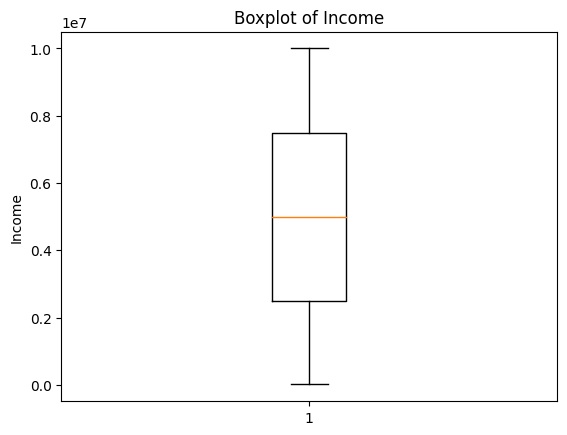

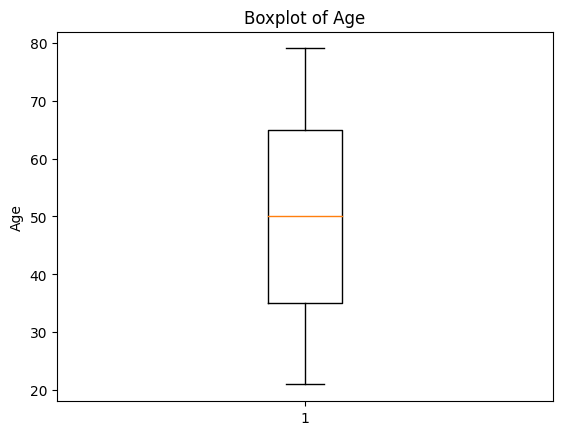

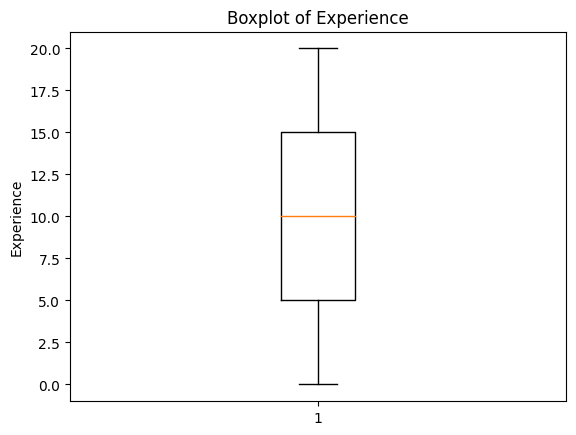

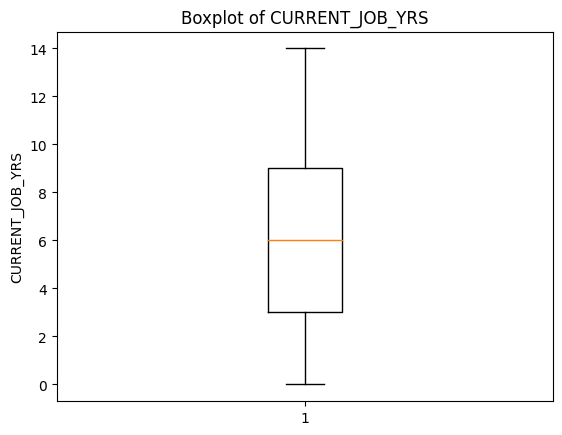

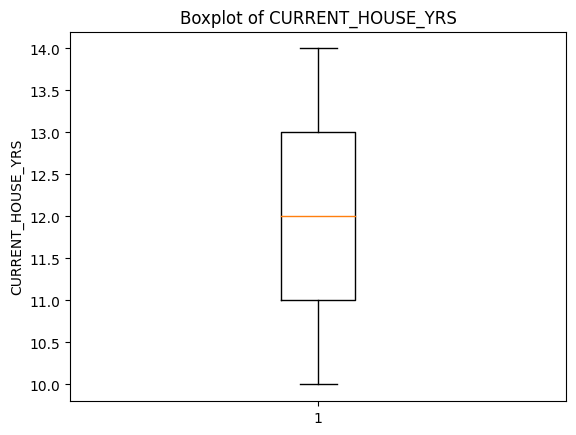

In [41]:
for i in num_var:
    plt.boxplot(encoded_data[i])
    plt.ylabel(i)
    plt.title(f'Boxplot of {i}')
    plt.show()

In [42]:
encoded_data[encoded_data["Age"] - encoded_data["Experience"] < 15]

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_Group,Income_Category,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
8,7566849,24,17,0,1,11,11,0,Young,High,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,8964846,23,12,0,0,5,13,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24,1065465,23,15,1,0,4,12,0,Young,Low,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27,9643150,24,13,0,0,6,14,0,Young,High,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32,4128828,21,10,0,0,10,12,0,Young,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251949,1196390,30,18,0,0,4,12,1,Young,Low,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
251951,4664428,23,20,0,0,10,10,0,Young,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
251967,1036851,23,9,0,0,6,10,0,Young,Low,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
251970,7692834,23,19,0,0,12,12,0,Young,High,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
encoded_data = encoded_data.drop(encoded_data[encoded_data["Age"] - encoded_data["Experience"] < 15].index)

In [44]:
len(encoded_data)

229828

In [45]:
encoded_data.drop(columns=num_var).head(10)

,Married/Single,Car_Ownership,Risk_Flag,Age_Group,Income_Category,Experience_Category,Current_JobYrs_Category,Current_HouseYrs_Category,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,0,0,0,Young,Low,Low,Low,12-14,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,Young,High,Medium,High,12-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,0,Senior,Medium,Low,Low,10-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,1,1,Middle-Age,Medium,Low,Low,10-12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,Middle-Age,Medium,Medium,Low,12-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0,0,0,Senior,High,Low,Low,10-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,1,0,0,Middle-Age,Medium,Medium,Medium,10-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0,0,0,Young,Low,Low,Low,12-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,0,0,0,Senior,Medium,Low,Medium,10-12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0,0,0,Young,Medium,Low,Low,12-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## **Standardization**

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data[num_var])
scaled_df_data = pd.DataFrame(scaled_data, columns = num_var)

In [47]:
scaled_df_data.head(10)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.282050,-1.837357,-1.105646,-0.865592,0.719808
1,0.894767,-0.771960,0.075646,0.789405,0.719808
2,-0.348939,0.857471,-0.936890,-0.589759,-1.423048
3,0.437211,-0.709289,-1.274401,-1.141425,0.005523
4,0.267951,-0.333267,0.244402,-0.865592,1.434094
5,0.666146,0.732131,-1.611913,-1.693091,0.005523
6,-0.361729,0.356108,0.750670,0.513572,0.005523
7,-1.142382,-1.210653,-1.274401,-1.141425,1.434094
8,-0.125774,1.609517,-0.430622,0.237739,0.005523
9,0.564547,-1.900028,-0.936890,-0.589759,1.434094


In [48]:
transformed_data = pd.concat([scaled_df_data.reset_index(drop=True), encoded_data.drop(columns=num_var).reset_index(drop=True)], axis=1)
transformed_data.head(10)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single,Car_Ownership,Risk_Flag,Age_Group,Income_Category,...,House_Ownership_rented,Region_Central,Region_Eastern,Region_Northeastern,Region_Northern,Region_Southern,Region_Western,Profession_Cat_Government,Profession_Cat_Professional,Profession_Cat_Service
0,-1.282050,-1.837357,-1.105646,-0.865592,0.719808,0,0,0,Young,Low,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.894767,-0.771960,0.075646,0.789405,0.719808,0,0,0,Young,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.348939,0.857471,-0.936890,-0.589759,-1.423048,1,0,0,Senior,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.437211,-0.709289,-1.274401,-1.141425,0.005523,0,1,1,Middle-Age,Medium,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.267951,-0.333267,0.244402,-0.865592,1.434094,0,0,1,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.666146,0.732131,-1.611913,-1.693091,0.005523,0,0,0,Senior,High,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,-0.361729,0.356108,0.750670,0.513572,0.005523,1,0,0,Middle-Age,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,-1.142382,-1.210653,-1.274401,-1.141425,1.434094,0,0,0,Young,Low,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,-0.125774,1.609517,-0.430622,0.237739,0.005523,0,0,0,Senior,Medium,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.564547,-1.900028,-0.936890,-0.589759,1.434094,0,0,0,Young,Medium,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229828 entries, 0 to 229827
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Income                        229828 non-null  float64 
 1   Age                           229828 non-null  float64 
 2   Experience                    229828 non-null  float64 
 3   CURRENT_JOB_YRS               229828 non-null  float64 
 4   CURRENT_HOUSE_YRS             229828 non-null  float64 
 5   Married/Single                229828 non-null  int64   
 6   Car_Ownership                 229828 non-null  int64   
 7   Risk_Flag                     229828 non-null  int64   
 8   Age_Group                     229828 non-null  category
 9   Income_Category               229828 non-null  category
 10  Experience_Category           229828 non-null  category
 11  Current_JobYrs_Category       229828 non-null  category
 12  Current_HouseYrs_Category     

In [ ]:
title=['Marriage Status', 'House Ownership', 'Car Ownership', 'Profession', 'Region', 'Risk Flag']
plt.figure(figsize=(14,30))
for i, variable in enumerate(cat_var + ["Risk_Flag"]):
    plt.subplot(5,2,i+1)
    sns.set_palette('Set2')
    ax=sns.countplot(x=transformed_data[variable], data=transformed_data)
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
          percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df[variable]))
          x = p.get_x() + p.get_width() / 2
          y = p.get_y() + p.get_height() + 10
          plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())
plt.show()

## **Split Data**

In [50]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                             random_state=1)
def splitdata(X, y):
  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  # smotetm = SMOTETomek(random_state = 1)
  # X_train, y_train = smotetm.fit_resample(X_train, y_train)
  return X_train, X_test, y_train, y_test

In [51]:
def trainML(classifi_model, classifi_name, X_test, y_test):
  score_result = []
  classifi_model.fit(X_test, y_test)
  y_test_predict = classifi_model.predict(X_test)
  # score_result.append({'Classification Models': classifi_name, 'Accuracy': accuracy_score(y_train, y_train_predict), 'Precision': precision_score(y_train, y_train_predict), 'Recall': recall_score(y_train, y_train_predict),'F1 Score': f1_score(y_train, y_train_predict)},ignore_index = True)
  print(f1_score(y_test, y_test_predict))

In [52]:
transformed_data = transformed_data.drop(["Income_Category", "Experience_Category", "Current_JobYrs_Category", "Current_HouseYrs_Category", "Age_Group"], axis = 1)

In [53]:
X_train, X_test, y_train, y_test = splitdata(X = transformed_data.drop("Risk_Flag", axis=1).to_numpy(), y = transformed_data["Risk_Flag"].to_numpy())

## **Feature Selection**

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 8
pd.set_option('display.max_columns', None)

### **Backward Elimination**

In [119]:
df_x_train = pd.DataFrame(X_train, columns = transformed_data.drop("Risk_Flag", axis=1).columns)
df_y_train = pd.DataFrame(y_train, columns = ["Risk_Flag"])

In [120]:
model = sm.Logit(df_y_train, df_x_train).fit()

Optimization terminated successfully.
         Current function value: 0.367782
         Iterations 7


In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Risk_Flag   No. Observations:               183862
Model:                          Logit   Df Residuals:                   183845
Method:                           MLE   Df Model:                           16
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                0.006276
Time:                        07:05:30   Log-Likelihood:                -67621.
converged:                       True   LL-Null:                       -68048.
Covariance Type:            nonrobust   LLR p-value:                1.753e-171
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                          -0.0112      0.007     -1.561      0.119      -0.025       0.003
Age                             -0.0355      0.007     -4.950      0.000      -0.050      -0.021
Experience                      -0.1681      0.010    -16.440      0.000      -0.188      -0.148
CURRENT_JOB_YRS                  0.0572      0.010      5.734      0.000       0.038       0.077
CURRENT_HOUSE_YRS               -0.0125      0.007     -1.743      0.081      -0.027       0.002
Married/Single                  -0.1797      0.025     -7.210      0.000      -0.229      -0.131
Car_Ownership                   -0.1552      0.016     -9.710      0.000      -0.186      -0.124
House_Ownership_norent_noown    -0.8137   2.72e+05  -2.99e-06      1.000   -5.34e+05    5.34e+05
House_Ownership_owned           -0.9862   2.67e+05   -3.7e-06      1.000   -5.23e+05    5.23e+05
House_Ownership_rented          -0.6228   2.66e+05  -2.35e-06      1.000    -5.2e+05     5.2e+05
Region_Central                  -0.2279   9.37e+05  -2.43e-07      1.000   -1.84e+06    1.84e+06
Region_Eastern                  -0.3749   9.37e+05     -4e-07      1.000   -1.84e+06    1.84e+06
Region_Northeastern             -0.3285   9.48e+05  -3.47e-07      1.000   -1.86e+06    1.86e+06
Region_Northern                 -0.4717   9.37e+05  -5.03e-07      1.000   -1.84e+06    1.84e+06
Region_Southern                 -0.5145   9.37e+05  -5.49e-07      1.000   -1.84e+06    1.84e+06
Region_Western                  -0.5053    9.4e+05  -5.38e-07      1.000   -1.84e+06    1.84e+06
Profession_Cat_Government       -0.7213   7.96e+05  -9.06e-07      1.000   -1.56e+06    1.56e+06
Profession_Cat_Professional     -0.8450   7.96e+05  -1.06e-06      1.000   -1.56e+06    1.56e+06
Profession_Cat_Service          -0.8564   7.96e+05  -1.08e-06      1.000   -1.56e+06    1.56e+06
================================================================================================
"""

In [ ]:
sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [63]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.Logit(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [65]:
valid_features = backward_elimination(df_x_train, df_y_train)

Optimization terminated successfully.
         Current function value: 0.367782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367782
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367789
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367797
         Iterations 6


In [67]:
valid_features

['Age',
 'Experience',
 'CURRENT_JOB_YRS',
 'Married/Single',
 'Car_Ownership',
 'House_Ownership_norent_noown',
 'House_Ownership_owned',
 'House_Ownership_rented',
 'Region_Eastern',
 'Region_Northeastern',
 'Region_Northern',
 'Region_Southern',
 'Region_Western',
 'Profession_Cat_Professional',
 'Profession_Cat_Service']

### **Random Forest Importances**

In [89]:
RF = RandomForestClassifier(n_estimators = 20)

In [92]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [103]:
df_importances = pd.DataFrame({"Features": transformed_data.drop(["Risk_Flag"], axis = 1).columns, "Index": RF.feature_importances_})

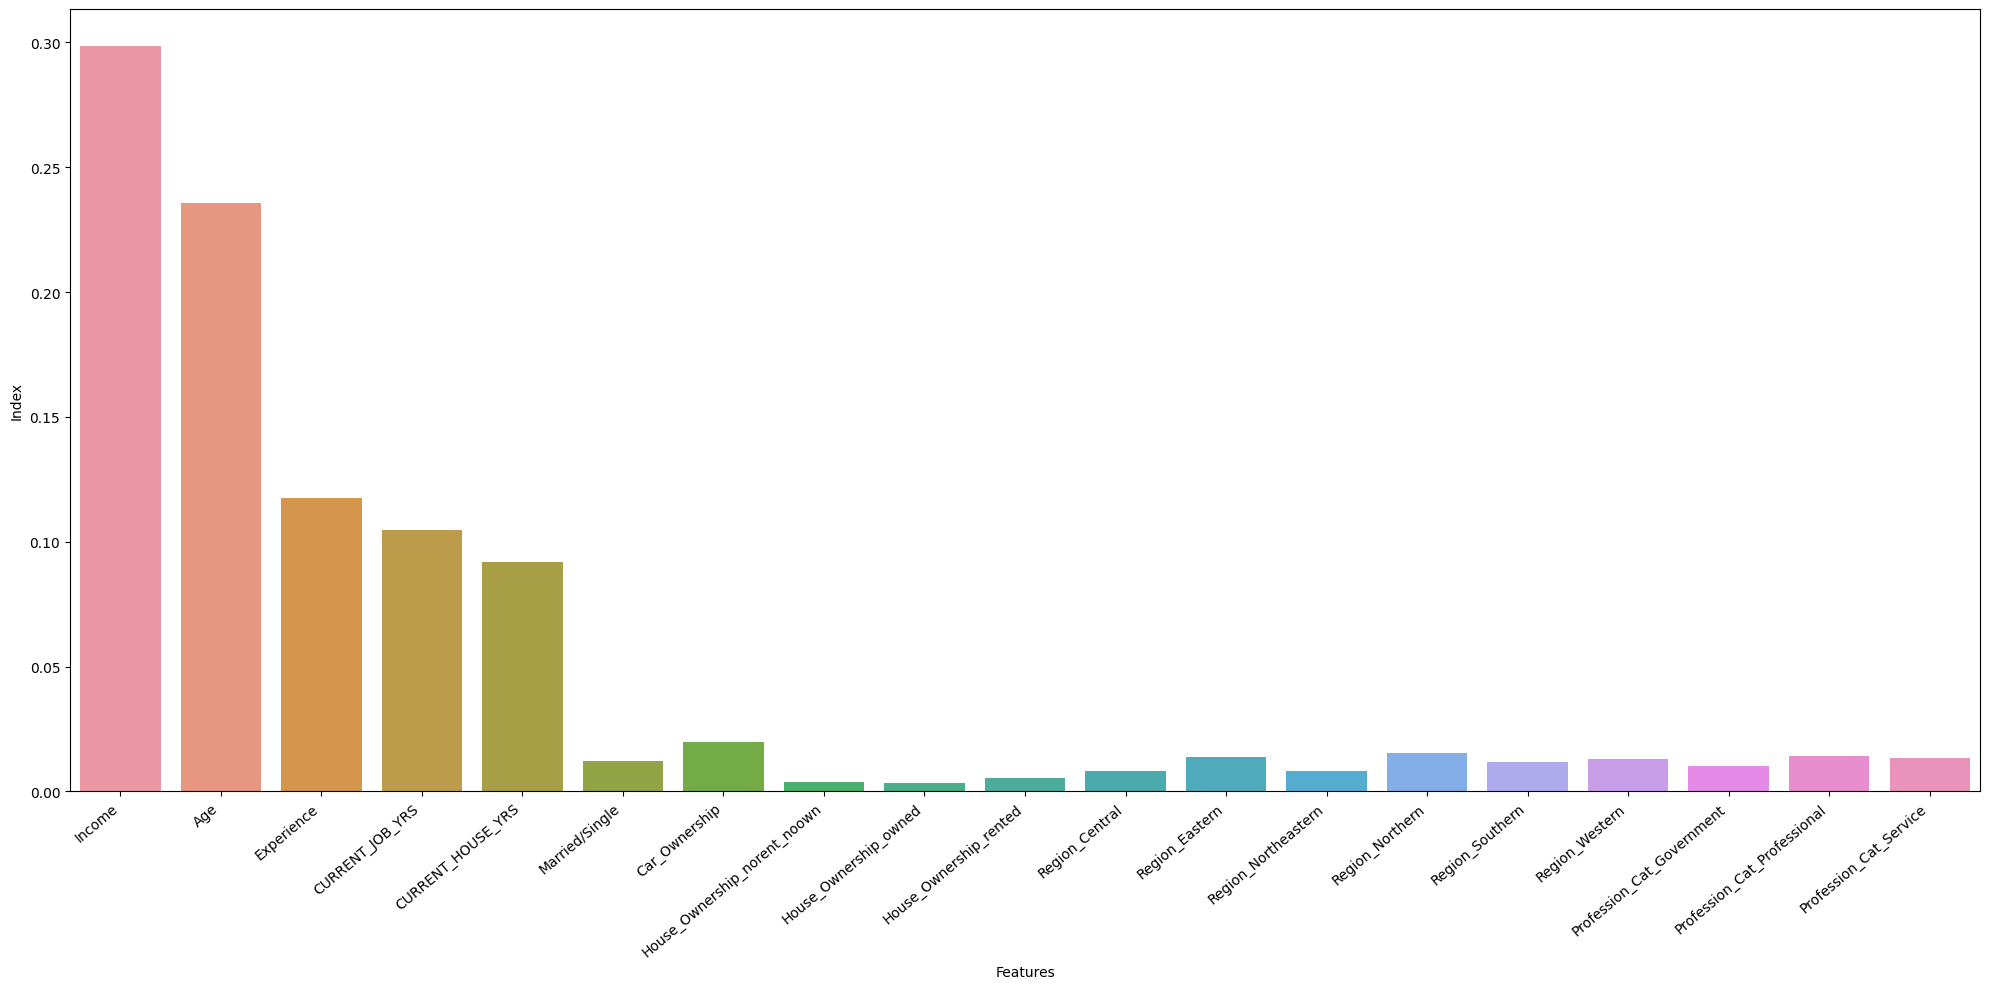

In [117]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'Features', y = 'Index', data = df_importances)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## **Train Model**

### **Baseline Model (Decision Tree)**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, max_depth=8)

In [ ]:
trainML(clf, 'Decision Tree', X_train=X_train, y_train=y_train)